# (Ford GoBike System Data)

## by (Hany Y Wasef)

## Investigation Overview

>Trip duration in minutes is the main feature that interests me. I'm more interested in discovering which features are best for predicting trip duration. I would expect user type to be a major trait I used because of the different styles between customer (A frequent user with a subscription plan.) and subscribers (The occasional user who purchases individual flights.)


## Dataset Overview

> In this project I will focus on information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area (In February 2019).

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
fordbike_2019 = pd.read_csv('fordgobike_201902_clean.csv')
fordbike_2019.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,duration_min,start_hour,end_hour,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803706,11.733379,13.456165,13.609533,34.196294
std,1642.204905,111.648819,111.335635,1659.195937,10.115522,27.370082,4.734282,4.748029,10.115522
min,61.000000,3.000000,3.000000,11.000000,1900.000000,1.016667,0.000000,0.000000,18.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,5.383333,9.000000,9.000000,27.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000,8.500000,14.000000,14.000000,32.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,13.150000,17.000000,18.000000,39.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,1409.133333,23.000000,23.000000,119.000000


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

Majority of users have a tendency towards using the bikes for a short-time duration trip.Most trips take between 4 to 15 minutes. It also clear that The Subscriber type is the more common type than Customer type, with subscriber type accounting for about 90%.

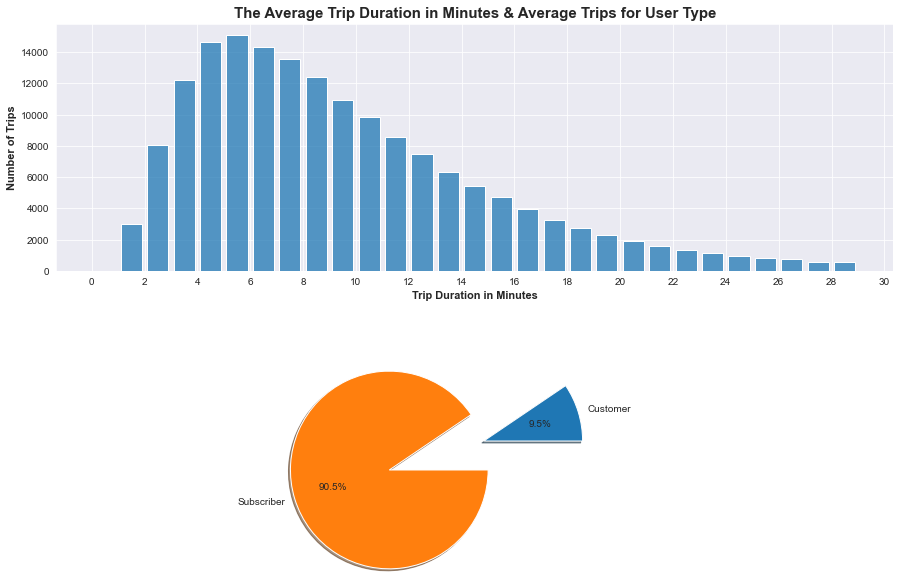

In [7]:
names = ['Customer', 'Subscriber']
x = fordbike_2019.groupby('user_type').size()
y = x / len(fordbike_2019.user_type)

sb.set_style('darkgrid')

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
bins = np.arange(0, 30, 1)
ticks = np.arange(0, 32, 2)
labels = ['{}'.format(v) for v in ticks]
sb.histplot(data= fordbike_2019, x= 'duration_min', bins = bins, shrink=0.8, )
plt.xlabel('Trip Duration in Minutes',fontsize=11, fontweight='bold')
plt.ylabel('Number of Trips',fontsize=11, fontweight='bold')
plt.title('The Average Trip Duration in Minutes & Average Trips for User Type', fontsize=15, fontweight='bold')

plt.xticks(ticks, labels)
plt.subplot(2,1,2)
plt.pie(fordbike_2019.groupby('user_type').size(), explode=y, labels=names, shadow=True, startangle=0, autopct='%1.1f%%');

## (Visualization 2)

The subscribers are riding much shorter rides compared to customers every day of the week. Both types of users have a clear increase in trip duration on Saturdays and Sundays during the weekends, especially for regular customers. The use of subscribers appears to be more efficient than clients in general and has maintained a very constant average duration from Monday to Friday.

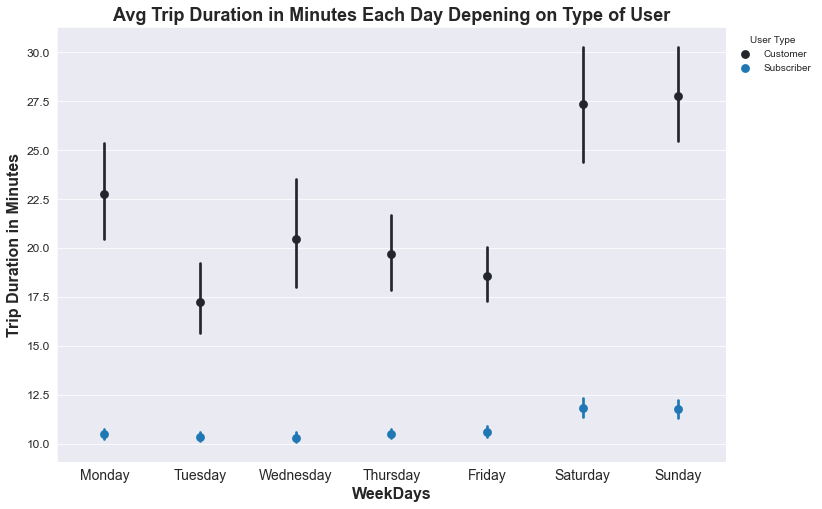

In [25]:
base_color = sb.color_palette()[0]
day_ordered = ['Monday','Tuesday','Wednesday','Thursday',
            'Friday','Saturday','Sunday']
plt.figure(figsize=(12,8))
ax = sb.pointplot(data=fordbike_2019, x='start_day', y='duration_min', 
             color=base_color, order=day_ordered,
             hue='user_type', linestyles='')
sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='User Type', frameon=False)
plt.xlabel('WeekDays', fontsize=16, fontweight='bold')
plt.ylabel('Trip Duration in Minutes', fontsize=16, fontweight='bold')
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis='y', labelsize=12)

plt.title('Avg Trip Duration in Minutes Each Day Depening on Type of User', fontsize=18, fontweight='bold')
sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='User Type', frameon=False);

## (Visualization 3)

- Subscriber of bike share clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, while customer of bike share tend to ride most in the afternoon or early evening more for roaming and for relaxation
- It appears that subscribers are riding much shorter rides compared to customers every day of the week. Both types of users have a clear increase in trip duration on Saturdays and Sundays during the weekends, especially for regular customers. The use of subscribers appears to be more efficient than clients in general and has maintained a very constant average duration from Monday to Friday.
- Subscribers use the system heavily on working days, ie from Monday to Friday. Customers use a bikeshare a lot on weekends(saturday,sunday), especially in the afternoon. For Subscriber Most trips concentrate around 7-9 a.m. and 4-6 p.m.

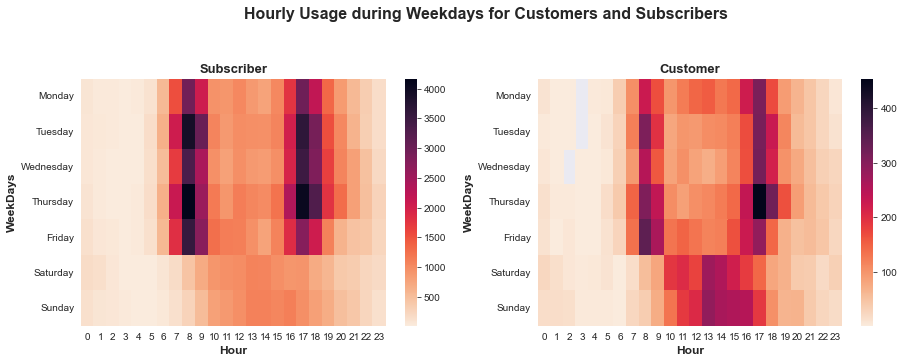

In [21]:
day_ordered = ['Monday','Tuesday','Wednesday','Thursday',
            'Friday','Saturday','Sunday']
trip_sub = fordbike_2019.query('user_type == "Subscriber"').groupby(['start_day', 'start_hour']).size()
trip_sub = trip_sub.reset_index(name='count').pivot(index='start_day', columns='start_hour', values='count')
trip_sub = trip_sub.reindex(day_ordered)
trip_cus = fordbike_2019.query('user_type == "Customer"').groupby(['start_day', 'start_hour']).size()
trip_cus = trip_cus.reset_index(name='count').pivot(index= 'start_day', columns='start_hour', values='count')
trip_cus = trip_cus.reindex(day_ordered)


plt.figure(figsize=(15,10))
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=16, fontweight='bold')

plt.subplot(2,2,1)
sb.heatmap(trip_sub, cmap='rocket_r')
plt.xlabel('Hour', fontsize=12, fontweight='bold')
plt.ylabel('WeekDays', fontsize=12, fontweight='bold')

plt.title('Subscriber', fontsize=13, fontweight='bold')


plt.subplot(2,2,2)
sb.heatmap(trip_cus, cmap='rocket_r')
plt.xlabel('Hour', fontsize=12, fontweight='bold')
plt.title('Customer', fontsize=13, fontweight='bold')
plt.ylabel('WeekDays', fontsize=12, fontweight='bold');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [22]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 714080 bytes to slide_deck_template.slides.html
